In [193]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
import seaborn as sns
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [194]:
data_path = ("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/New_York_offenses/NEW_YORK-Offenses_Known_to_Law_Enforcement_by_City_2013%20-%2013tbl8ny.csv"
            )
crime_df = pd.read_csv(data_path, header=1, index_col=False, skiprows=[0, 1, 2], skipfooter=3)
crime_df.columns=['City','Population', 'Violent crime', 'Murder', 'Rape revised', 'Rape legacy', 'Robbery', 
         'Aggravated assault','Property crime', 'Burglary', 'Larceny', 'Motor vehicle theft', 'Arson']
crime_df['Population'] = crime_df['Population'].str.replace(',', '')
crime_df['Population'] = crime_df['Population'].astype(int)

crime_df['Robbery'] = crime_df['Robbery'].str.replace(',', '')
crime_df['Robbery'] = crime_df['Robbery'].astype(int)

crime_df.head(10)

/Users/bryancorder/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  This is separate from the ipykernel package so we can avoid doing imports until


,City,Population,Violent crime,Murder,Rape revised,Rape legacy,Robbery,Aggravated assault,Property crime,Burglary,Larceny,Motor vehicle theft,Arson
0,Adams Village,1861,0,0,nan,0,0,0,12,2,10,0,0.000
1,Addison Town and Village,2577,3,0,nan,0,0,3,24,3,20,1,0.000
2,Akron Village,2846,3,0,nan,0,0,3,16,1,15,0,0.000
3,Albany,97956,791,8,nan,30,227,526,"4,090",705,"3,243",142,nan
4,Albion Village,6388,23,0,nan,3,4,16,223,53,165,5,nan
5,Alfred Village,4089,5,0,nan,0,3,2,46,10,36,0,nan
6,Allegany Village,1781,3,0,nan,0,0,3,10,0,10,0,0.000
7,Amherst Town,118296,107,1,nan,7,31,68,"2,118",204,"1,882",32,3.000
8,Amityville Village,9519,9,0,nan,2,4,3,210,16,188,6,1.000
9,Amsterdam,18182,30,0,nan,0,12,18,405,99,291,15,0.000


In [195]:
data_df = crime_df[['City', 'Population', 'Murder', 'Robbery']].copy()

data_df['Population Squared'] = crime_df['Population'] ** 2
print(data_df.loc[data_df.Murder > 200, 'Murder'])

216    335
Name: Murder, dtype: int64


In [196]:
#Double Check there is no missing data

def num_missing(x):
  return sum(x.isnull())

#Applying per column:
print("Missing values per column:")
print(data_df.apply(num_missing, axis=0))

Missing values per column:
City                  0
Population            0
Murder                0
Robbery               0
Population Squared    0
dtype: int64


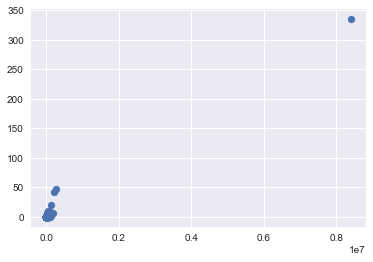

In [197]:
x = data_df['Population']
y = data_df['Murder']
plt.scatter(x, y)
plt.show()

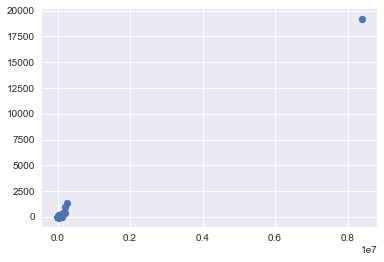

In [198]:
x = data_df['Population']
y = data_df['Robbery']
plt.scatter(x, y)
plt.show()

In [199]:
#Turn Murder and Robbery into binary
data_df.loc[data_df.Murder > 0, 'Murder'] = 1
data_df.loc[data_df.Robbery > 0, 'Robbery'] = 1